In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [10]:
pip install ultralytics

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="M6SSzwzyzuvFlAmt0iym")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 135.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov11:: 100%|██████████| 20262/20262 [00:03<00:00, 5988.63it/s]


In [3]:
dataset.location

'/content/License-Plate-Recognition-11'

In [4]:
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=Fals

# Training Results

In [7]:
df = pd.read_csv('runs/detect/train/results.csv')
df.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
40,41,5803.88,1.01385,0.40952,1.03461,0.98608,0.94169,0.96979,0.70008,1.06886,0.41099,1.04603,0.000416,0.000416,0.000416
41,42,5940.24,1.01251,0.40263,1.03474,0.98939,0.94077,0.97297,0.70204,1.05431,0.40760,1.03908,0.000376,0.000376,0.000376
42,43,6076.08,1.00609,0.39954,1.03269,0.98166,0.94897,0.97432,0.70634,1.05928,0.40208,1.04215,0.000337,0.000337,0.000337
43,44,6211.93,1.00339,0.39494,1.03360,0.98567,0.94351,0.97360,0.70559,1.05641,0.40677,1.03937,0.000297,0.000297,0.000297
44,45,6348.09,0.99446,0.38989,1.02870,0.98947,0.94158,0.97374,0.70894,1.05209,0.40118,1.03819,0.000258,0.000258,0.000258
45,46,6482.12,0.98484,0.38476,1.02709,0.99056,0.94396,0.97480,0.70911,1.04906,0.40009,1.03500,0.000218,0.000218,0.000218
46,47,6619.77,0.98398,0.38085,1.02261,0.98674,0.94895,0.97412,0.71120,1.04494,0.39573,1.03233,0.000178,0.000178,0.000178
47,48,6754.92,0.97956,0.37819,1.01945,0.98526,0.94715,0.97407,0.71065,1.04375,0.39325,1.03244,0.000139,0.000139,0.000139
48,49,6892.70,0.97158,0.37465,1.01673,0.98210,0.95171,0.97464,0.71004,1.05041,0.39408,1.03352,0.000099,0.000099,0.000099
49,50,7027.75,0.96909,0.37099,1.01796,0.98399,0.95179,0.97494,0.71023,1.04560,0.39083,1.03209,0.000060,0.000060,0.000060


## Training Progress Visualization

This comprehensive plot shows how the model improved over 50 epochs:

**Loss Curves** (Lower is Better):
- **Box Loss**: Measures accuracy of bounding box predictions
- **Class Loss**: Measures accuracy of object classification  
- **DFL Loss**: Distribution Focal Loss for better localization

**Performance Metrics** (Higher is Better):
- **mAP@50**: Main detection accuracy metric (98%+ achieved!)
- **mAP@50-95**: Stricter accuracy across multiple IoU thresholds
- **Precision & Recall**: Balance between accurate detections and finding all license plates

**Learning Rate**: Shows how the optimizer adjusted learning speed during training

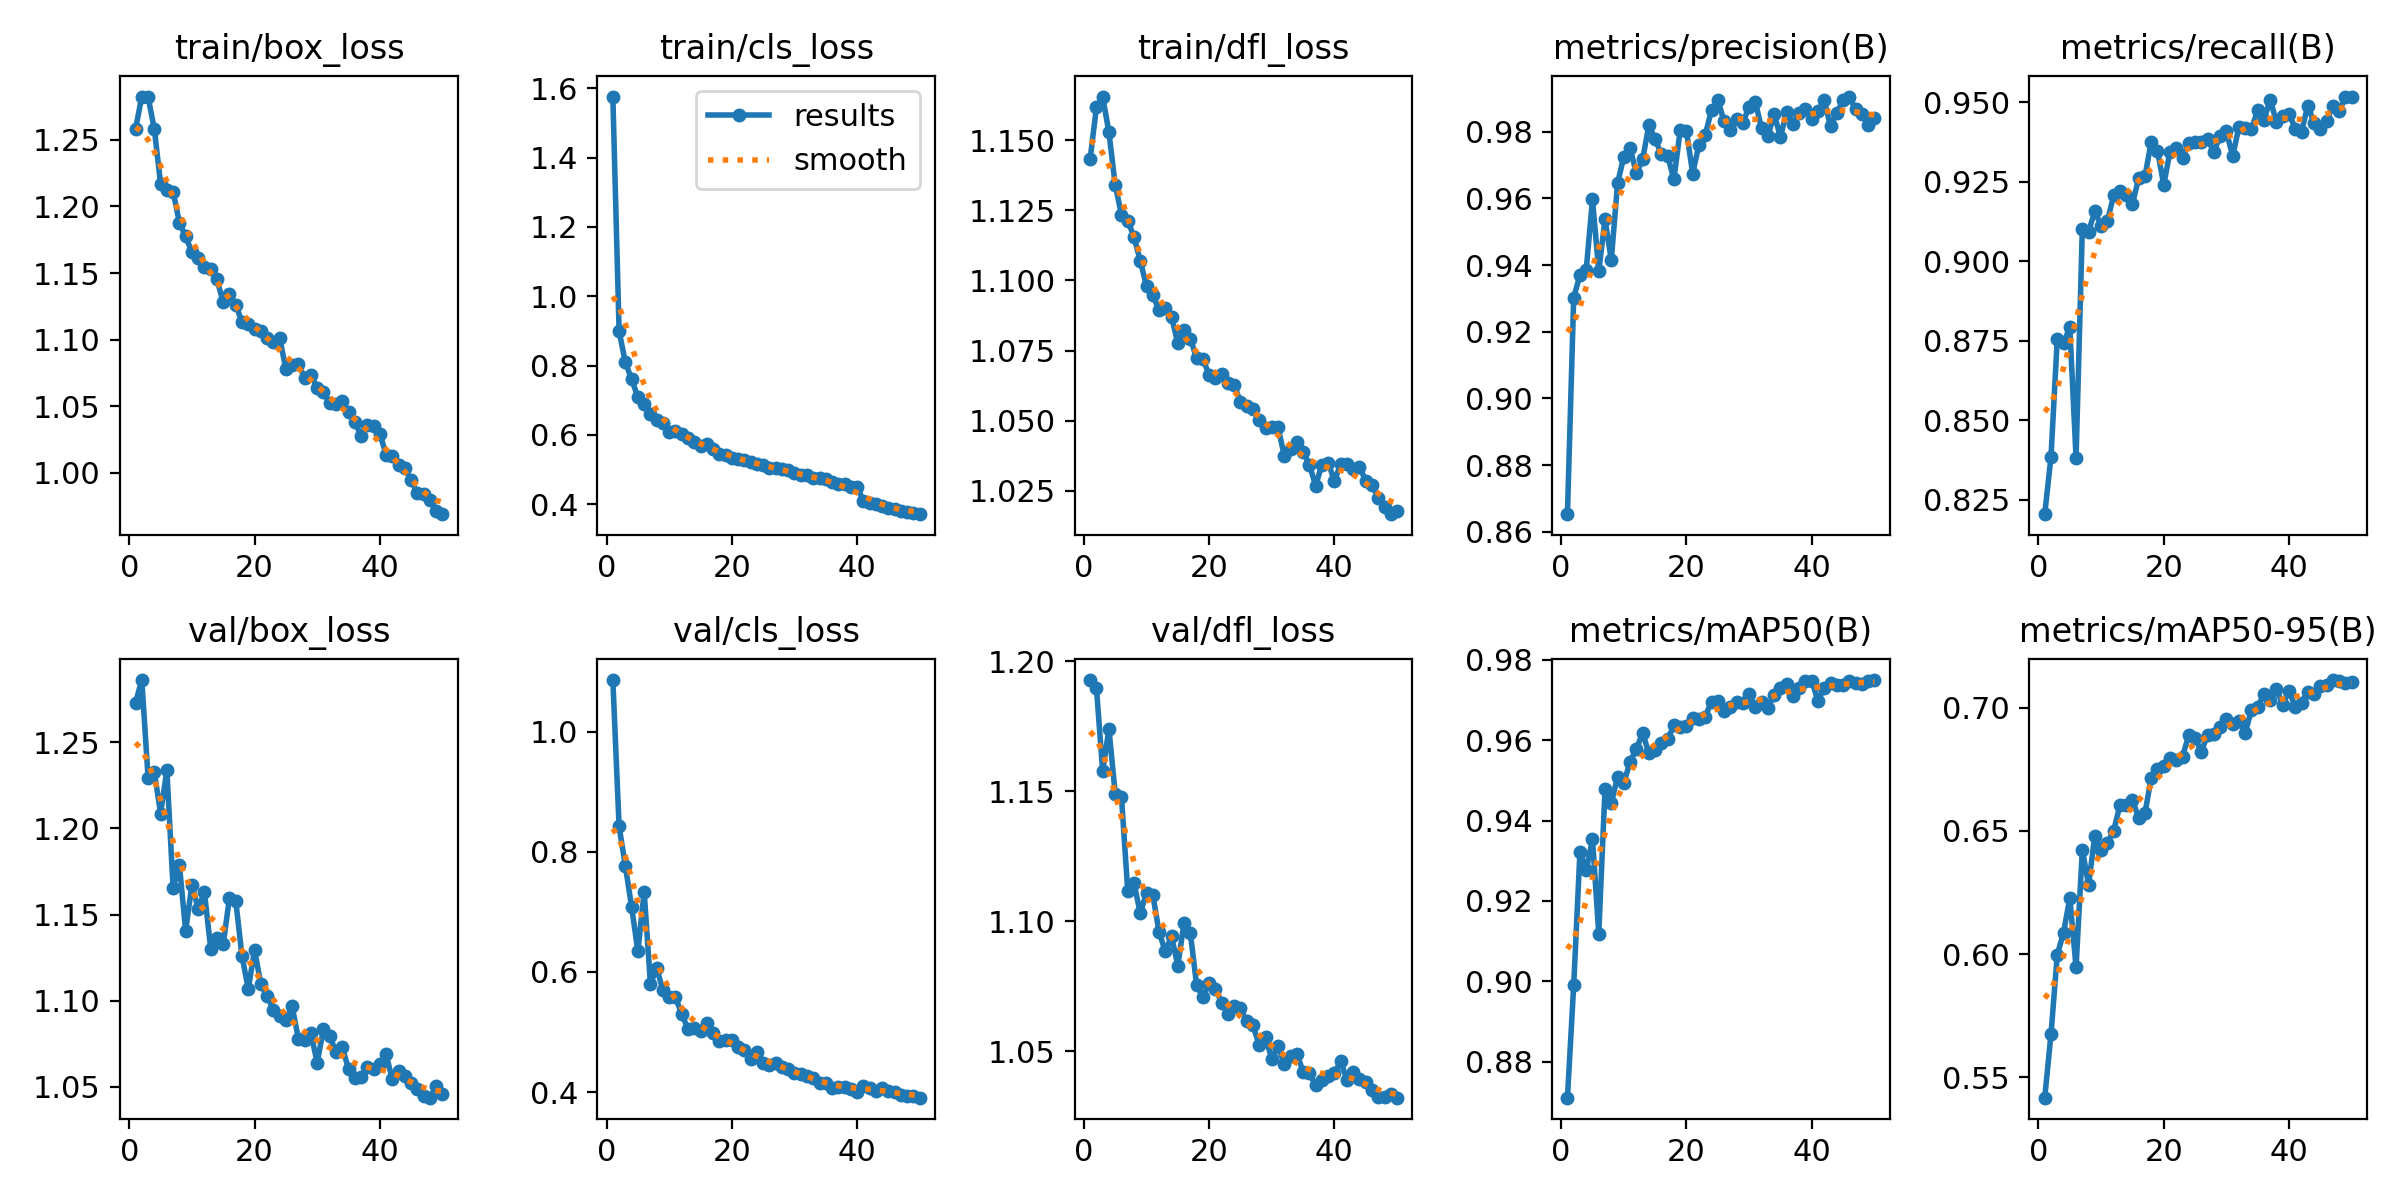

In [14]:
Image('runs/detect/train/results.png')

## YOLO Training Results Summary

This is YOLO's built-in results visualization showing all key metrics in one comprehensive image. It includes loss curves, accuracy metrics, and performance trends throughout the 50 epochs of training.

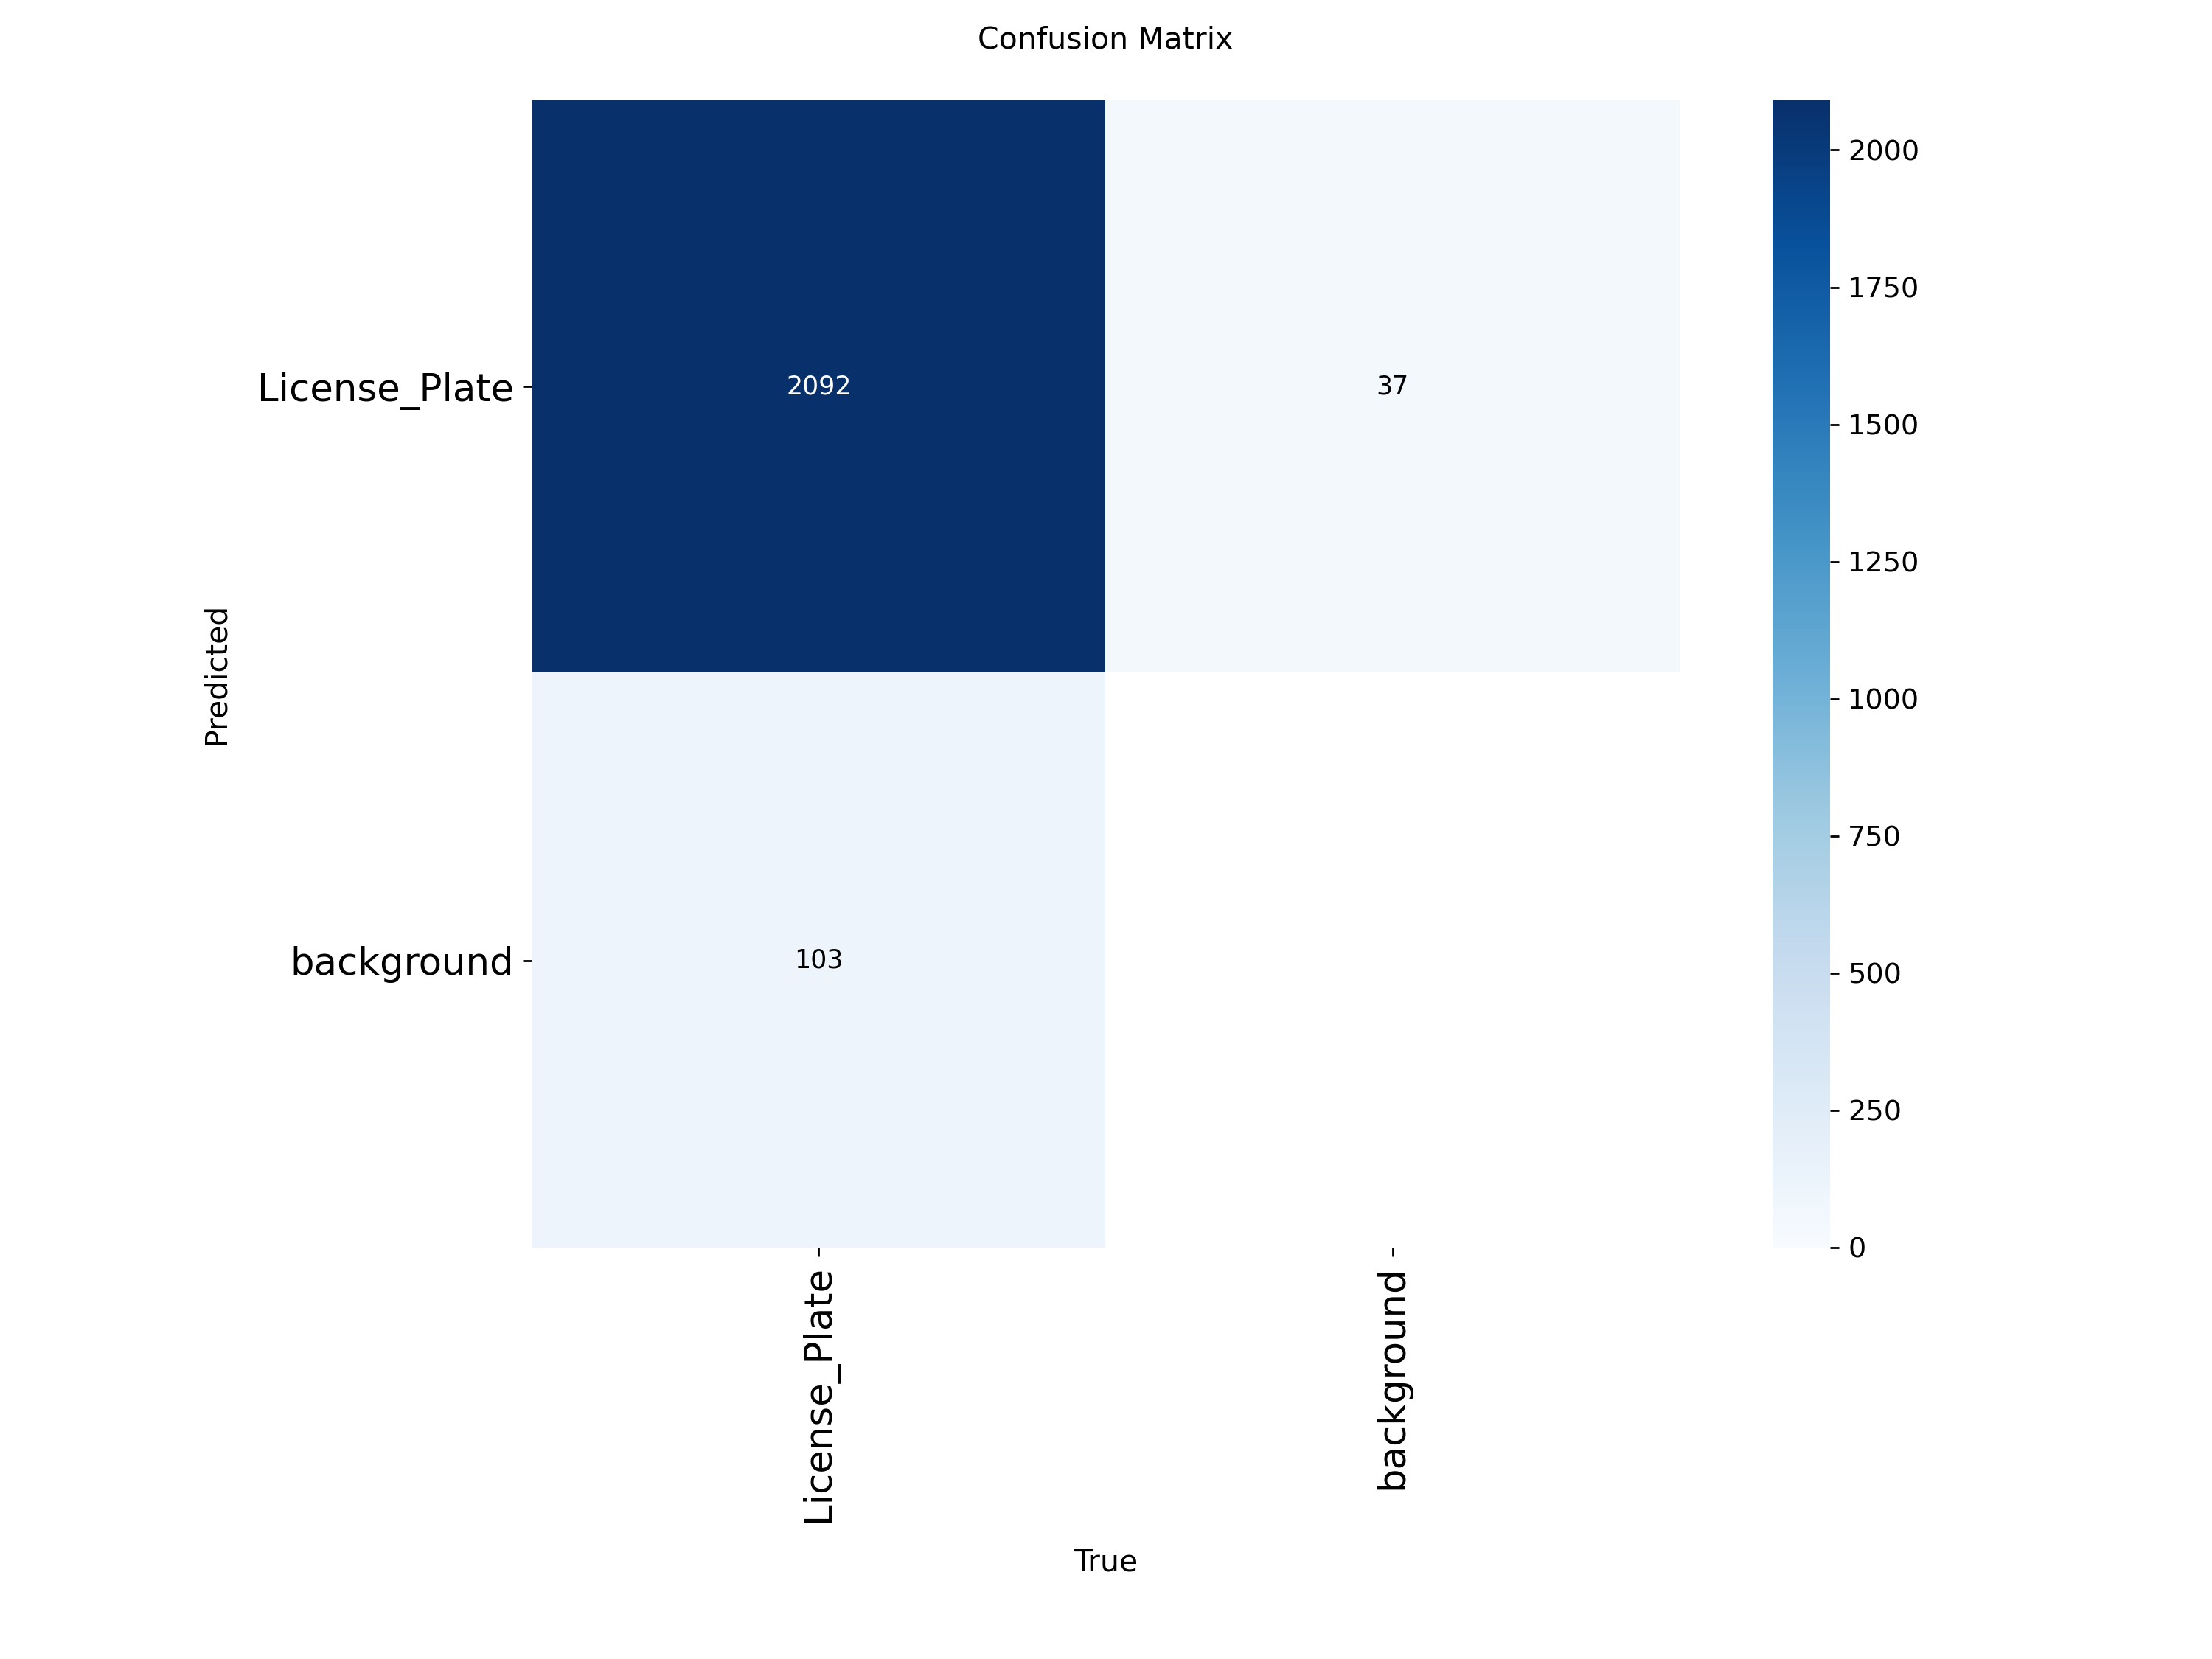

In [15]:
Image('runs/detect/train/confusion_matrix.png')

## Confusion Matrix Analysis

The confusion matrix shows model performance:
- **License_Plate vs License_Plate**: 2092 correct detections, 37 missed
- **Background vs Background**: 103 correctly identified as background
- **Very high accuracy** with minimal false positives/negatives

This demonstrates excellent license plate detection capability!